In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas
df = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/магистратура/спецкурс/avocado.csv")

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
X = df.drop(["Unnamed: 0", "Date", "AveragePrice", "region", "type"], axis=1)
y = df["AveragePrice"]

In [11]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6159848590>,
      dtype=object)

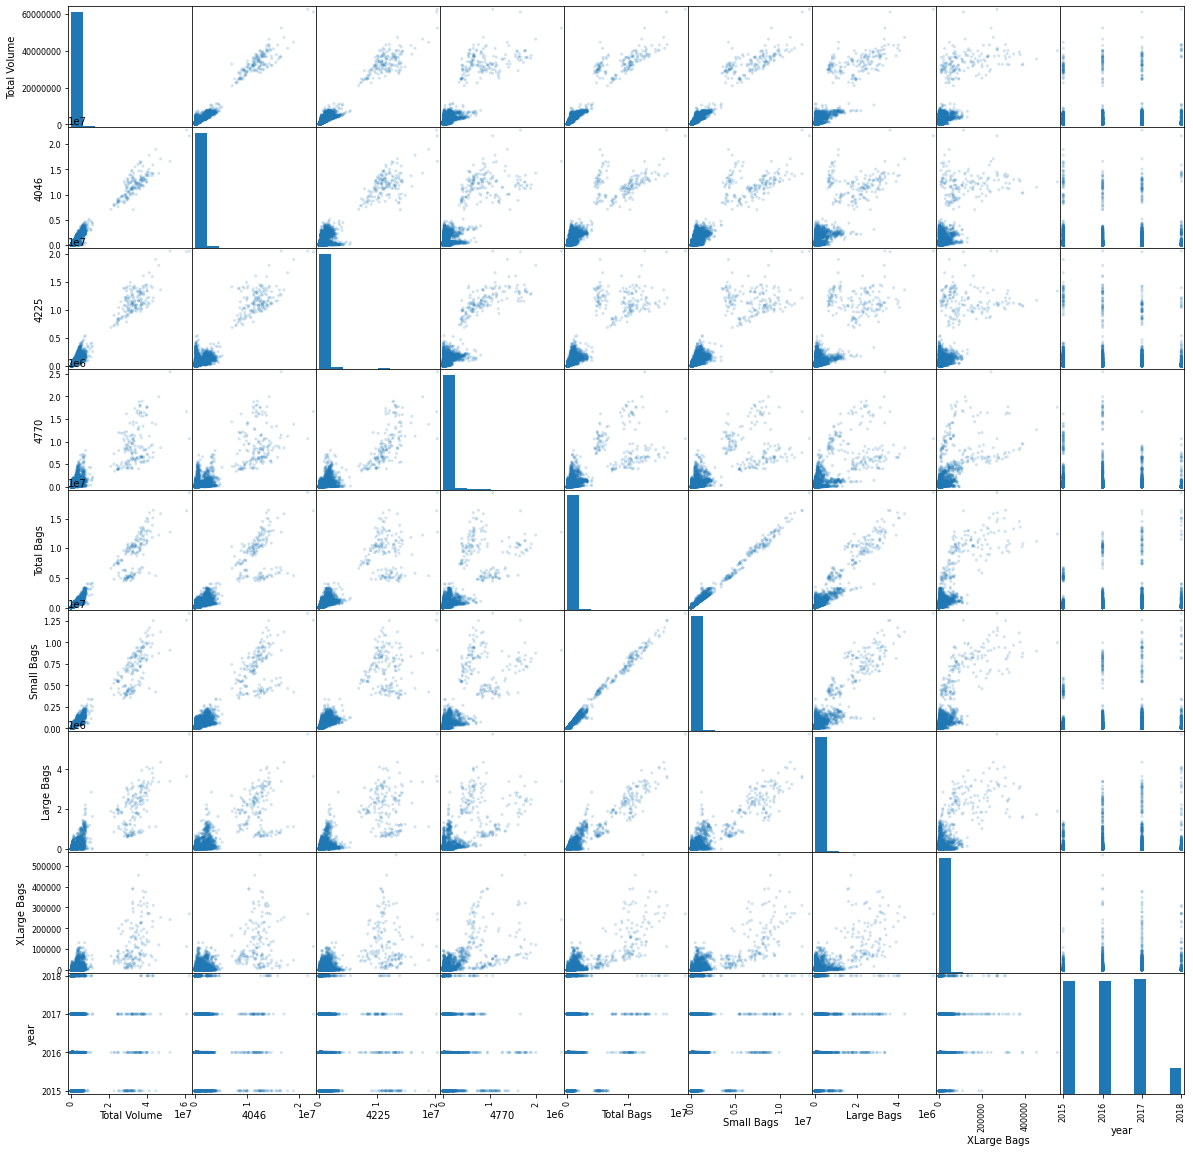

In [12]:
pandas.plotting.scatter_matrix(X, alpha=0.2, figsize=(20,20))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {"LinearRegression": LinearRegression(),
	          "RandomForest": RandomForestRegressor(n_estimators=1000, max_features ='sqrt'), 
	          "KNeighbors": KNeighborsRegressor(n_neighbors=5), 
	          "SVR": SVR()}

In [16]:

models_result = {}
max_r2 = 0
best_model = ""
for i in models:
  models[i].fit(X_train, y_train)
  y_pred = models[i].predict(X_test)
  r2 = r2_score(y_test, y_pred)
  if r2 > max_r2:
    max_r2 = r2
    best_model = i
  models_result[i] = y_pred
  print(i, "\n\t mean_squared_error: ", mean_squared_error(y_test, y_pred))
  print("\t r2_score: ", r2)
print("\n\nBest model: ", best_model)

LinearRegression 
	 mean_squared_error:  0.1525292045939977
	 r2_score:  0.054599851352800766
RandomForest 
	 mean_squared_error:  0.03181200857347943
	 r2_score:  0.8028241364387412
KNeighbors 
	 mean_squared_error:  0.05836298082191781
	 r2_score:  0.6382570086076091
SVR 
	 mean_squared_error:  0.1078474619444985
	 r2_score:  0.3315443634224242


Best model:  RandomForest




 LinearRegression


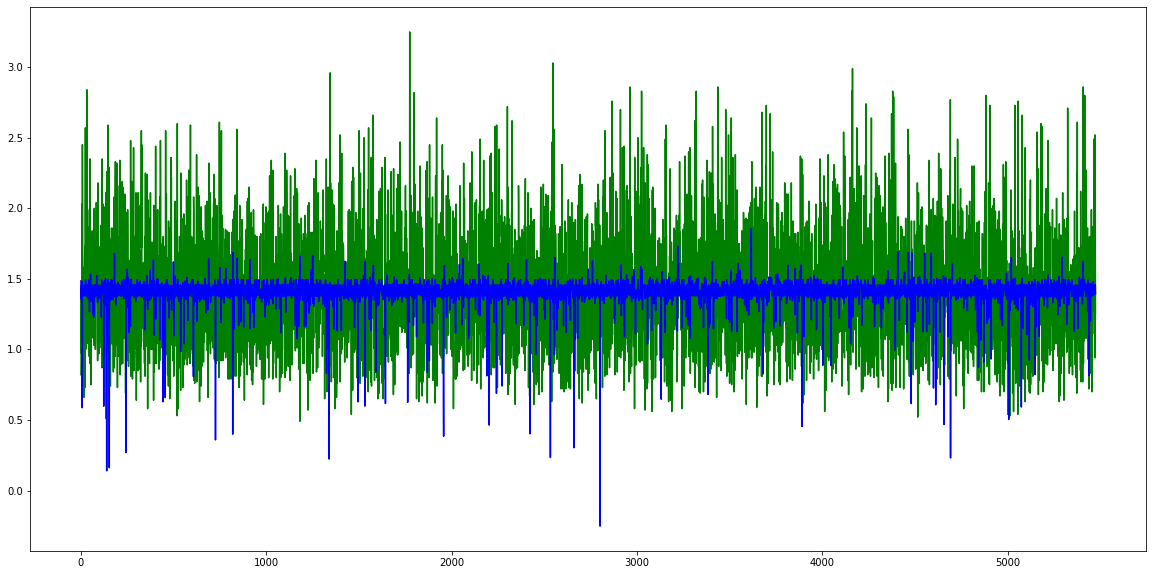



 RandomForest


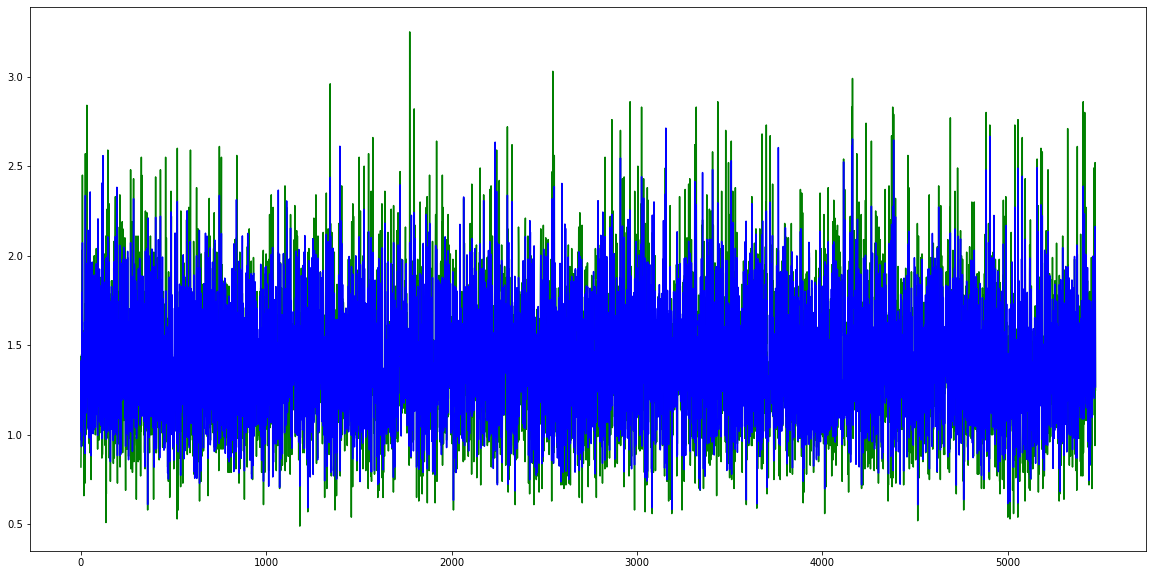



 KNeighbors


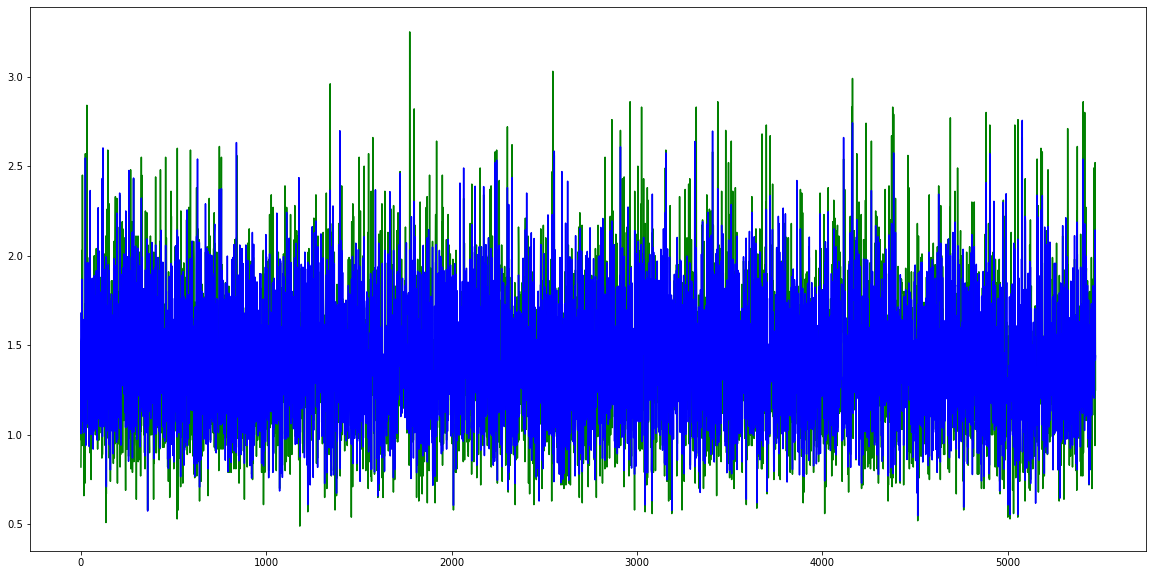



 SVR


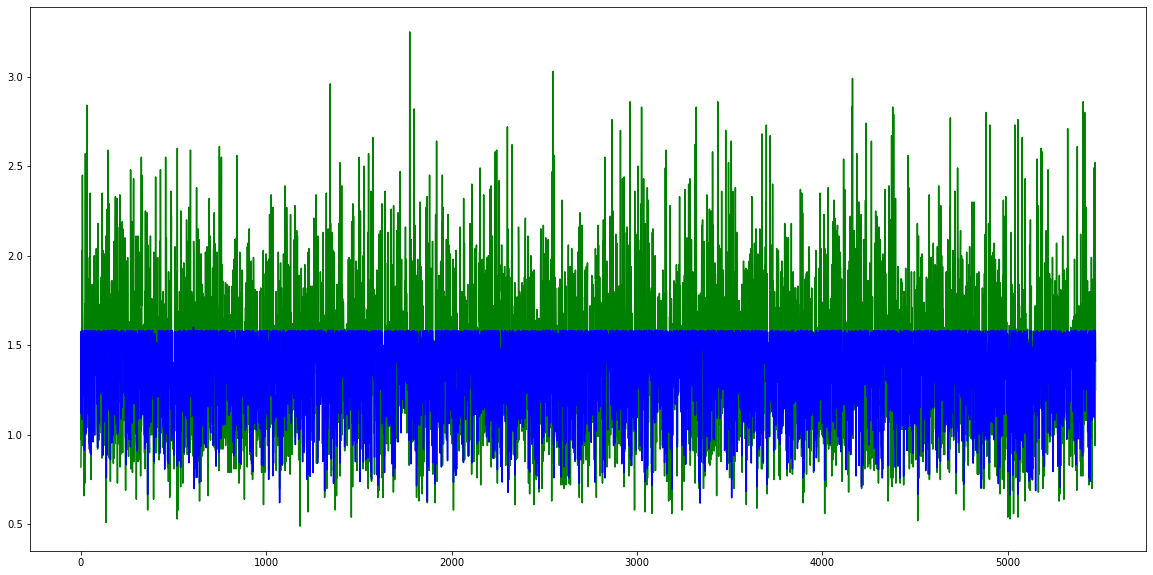

In [19]:
import matplotlib.pyplot as plt
for i in models_result:
  figure = plt.figure()
  figure.set_figwidth(20)
  figure.set_figheight(10)
  print("\n\n", i)
  plt.plot(range(len(y_test)), y_test, 'g')
  plt.plot(range(len(y_test)), models_result[i], 'b')
  plt.show()